## Final Project

### Cristina Rodriguez-Vera

### 1. Data sets

#### The PCoE Datasets

The project uses data sets from the Prognostic Data Repository <a href=https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/>Nasa PCoE Datasets</a>. These are an ongoing process collection of data sets that have been donated by various universities, agencies, or companies. 


The data sets employed are the Experiments on Li-Ion batteries.

|   |    |  
:--- | :--- 
|**Description** | Experiments on Li-Ion batteries. Charging and discharging at different temperatures. Records the impedance as the damage criterion. The data set was provided by the Prognostics CoE at NASA Ames.  |
|**Format** |The set is in .mat format and has been zipped. |
|**Datasets**|Download Battery Data Set 1 (36583 downloads) <br>Download Battery Data Set 2 (17425 downloads) <br>Download Battery Data Set 3 (14269 downloads)<br>Download Battery Data Set 4 (11003 downloads)<br>Download Battery Data Set 5 (11753 downloads)<br>Download Battery Data Set 6 (12385 downloads)<br>|
|**Dataset Citation**|	B. Saha and K. Goebel (2007). "Battery Data Set", NASA Ames Prognostics Data Repository (http://ti.arc.nasa.gov/project/prognostic-data-repository), NASA Ames Research Center, Moffett Field, CA

**Importing the libraries**

In [1]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import json
from scipy.io import loadmat
from myst_nb import glue
import datetime
import numpy as np
from markdown import markdown
import requests
import plotly.express as px
import seaborn as sns
from dash.dependencies import Input, Output, State# Load Data
import pandas as pd
import zipfile
import fnmatch
import os
import warnings
warnings.filterwarnings('ignore')

**Getting the data**

1. Check if the data already exists in the repository.
If the data is not available:
    1. Download the data.
    2. Decompress the data.
2. Load the data.

In [2]:
data_dir = 'Data'
dirs = ['battery_data_set_1', 'battery_data_set_2', 'battery_data_set_3',
        'battery_data_set_4', 'battery_data_set_5', 'battery_data_set_6']    
urls = ['https://ti.arc.nasa.gov/c/5/', 'https://ti.arc.nasa.gov/c/9/', 'https://ti.arc.nasa.gov/c/14/',
       'https://ti.arc.nasa.gov/c/15/', 'https://ti.arc.nasa.gov/c/16/', 'https://ti.arc.nasa.gov/c/17/']

# Check if the directory exists 
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)
# Check if the files exist, otherwise download them
for d, u in zip(dirs, urls):
    if not os.path.isdir(os.path.join(data_dir,d)):
        print('Downloading data set ' + d)
        r = requests.get(u, allow_redirects=True)
        open(os.path.join(data_dir,d)+'.zip', 'wb').write(r.content)
        with zipfile.ZipFile(os.path.join(data_dir,d)+'.zip', 'r') as zip_ref:
            zip_ref.extractall(os.path.join(data_dir,d))
    else:
        print('Data '+ d + ' available')

# All files are .mat format
includes =  ['*.mat'] #Microsoft Access Table
battery_type = dict()
ambient_temperature = dict()
time = dict()
data = dict()
for root, dirs, files in os.walk(data_dir, topdown=True):
    for pat in includes:
        for f in fnmatch.filter(files, pat):
            file = os.path.join(root, f)
            temp = loadmat(file)
            data_raw = temp[f.split('.')[0]]
            info_temp = [row for line in data_raw[0][0] for row in line.flat[0]]
            battery_type[f.split('.')[0]] = info_temp[0].flat[0]
            ambient_temperature[f.split('.')[0]] = info_temp[1].flat[0]
            time[f.split('.')[0]] = datetime.datetime(*list(info_temp[2][0].astype(int)))
            t = [row for line in info_temp[3] for row in line.flat[0]]
            cols = list(info_temp[3].dtype.names)
            if info_temp[0].flat[0] == 'charge':                    
                t1 = pd.DataFrame(np.concatenate(t)).T
                t1.columns = cols
            elif info_temp[0].flat[0] == 'impedance':         
                t4 = pd.DataFrame(np.concatenate(t[:3])).T
                t3 = pd.concat([t4, pd.DataFrame(np.concatenate(t[3]))], axis = 1)
                t2 = pd.DataFrame(np.concatenate(t[4]))
                t1 = pd.concat([t3, t2], axis = 1)        
                t1[cols[-2]] = np.repeat(t[5],len(t1))
                t1[cols[-1]] = np.repeat(t[6],len(t1))
                t1.columns = cols
            elif info_temp[0].flat[0] == 'discharge':
                t1 = pd.DataFrame(np.concatenate(t[:-1])).T
                t1[cols[-1]] = np.repeat(t[6],len(t1))
                t1.columns = cols
                t1.rename(columns = {'Current_load':'Current_charge', 'Voltage_load':'Voltage_charge'}, inplace=True)
            t1['Type'] = info_temp[0].flat[0]
            t1.rename(lambda x: x + '_(Volts)' if 'Voltage' in x else x, axis=1, inplace=True)
            t1.rename(lambda x: x + '_(Amps)' if 'Current' in x else x, axis=1, inplace=True)
            t1.rename(lambda x: x + '_(C)' if 'Temperature' in x else x, axis=1, inplace=True)
            data[f.split('.')[0]] = t1
total_t = pd.DataFrame()
for _, df in data.items():
    total_t = pd.concat([total_t, df], axis = 0)

Data battery_data_set_1 available
Data battery_data_set_2 available
Data battery_data_set_3 available
Data battery_data_set_4 available
Data battery_data_set_5 available
Data battery_data_set_6 available


The data contains the different batteries.

In [3]:
print('List of batteries available: {}. \n \nA total of {} batteries. \n\nWith {} records in total.'.format(list(battery_type.keys()), len(battery_type), len(total_t)))

List of batteries available: ['B0005', 'B0006', 'B0007', 'B0018', 'B0025', 'B0026', 'B0027', 'B0028', 'B0029', 'B0030', 'B0031', 'B0032', 'B0033', 'B0034', 'B0036', 'B0038', 'B0039', 'B0040', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B0047', 'B0048', 'B0049', 'B0050', 'B0051', 'B0052', 'B0053', 'B0054', 'B0055', 'B0056']. 
 
A total of 34 batteries. 

With 15604 records in total.


In [4]:
battery_type

{'B0005': 'charge',
 'B0006': 'charge',
 'B0007': 'charge',
 'B0018': 'charge',
 'B0025': 'impedance',
 'B0026': 'impedance',
 'B0027': 'impedance',
 'B0028': 'impedance',
 'B0029': 'impedance',
 'B0030': 'impedance',
 'B0031': 'impedance',
 'B0032': 'impedance',
 'B0033': 'discharge',
 'B0034': 'discharge',
 'B0036': 'discharge',
 'B0038': 'discharge',
 'B0039': 'discharge',
 'B0040': 'discharge',
 'B0041': 'discharge',
 'B0042': 'charge',
 'B0043': 'charge',
 'B0044': 'charge',
 'B0045': 'discharge',
 'B0046': 'discharge',
 'B0047': 'discharge',
 'B0048': 'discharge',
 'B0049': 'discharge',
 'B0050': 'discharge',
 'B0051': 'discharge',
 'B0052': 'discharge',
 'B0053': 'discharge',
 'B0054': 'discharge',
 'B0055': 'discharge',
 'B0056': 'discharge'}

Get total number of batteries by type:

In [5]:
df_b_type = pd.DataFrame(list(battery_type.items()), columns = ['Name', 'Type'])
df_b_type.groupby(['Type'], as_index = False)['Name'].count().rename(columns={'Name':'Total Number'})

,Type,Total Number
0,charge,7
1,discharge,19
2,impedance,8


Show an extract of the data set for each battery type

**Charge**:

In [6]:
data['B0005'].head()

,Voltage_measured_(Volts),Current_measured_(Amps),Temperature_measured_(C),Current_charge_(Amps),Voltage_charge_(Volts),Time,Type
0,3.873017,-0.001201,24.655358,0.000,0.003,0.000,charge
1,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,charge
2,4.000588,1.512731,24.675394,1.500,4.726,5.500,charge
3,4.012395,1.509063,24.693865,1.500,4.742,8.344,charge
4,4.019708,1.511318,24.705069,1.500,4.753,11.125,charge


**Discharge**:

In [7]:
data['B0039'].head()

,Voltage_measured_(Volts),Current_measured_(Amps),Temperature_measured_(C),Current_charge_(Amps),Voltage_charge_(Volts),Time,Capacity,Type
0,4.078135,-0.000788,24.624080,0.0002,0.000,0.000,0.119038,discharge
1,4.078326,-0.002889,24.748778,0.0002,4.093,9.360,0.119038,discharge
2,3.426046,-3.976358,24.874841,3.9970,1.307,19.516,0.119038,discharge
3,3.373424,-3.976350,25.108055,3.9970,1.266,28.875,0.119038,discharge
4,3.315420,-3.976961,25.407267,3.9970,1.220,38.219,0.119038,discharge


**Impedance**:

In [8]:
data['B0025'].head()

,Sense_current,Battery_current,Current_ratio_(Amps),Battery_impedance,Rectified_Impedance,Re,Rct,Type
0,864.849915-33.304897j,292.906494-84.523552j,2.755966+0.681580j,0.142920-0.119109j,0.096157-0.003359j,0.050642,0.105922,impedance
1,858.384827-42.131504j,300.446381-75.873299j,2.719040+0.546424j,0.177590-0.103414j,0.094086-0.003068j,0.050642,0.105922,impedance
2,856.722534-49.789986j,300.319275-68.138481j,2.748819+0.457881j,0.203669-0.084104j,0.095893-0.002791j,0.050642,0.105922,impedance
3,854.005859-56.501144j,303.563232-61.265869j,2.739260+0.366718j,0.222047-0.064616j,0.093146-0.002608j,0.050642,0.105922,impedance
4,853.948242-55.325485j,306.695618-55.267132j,2.728264+0.311246j,0.234174-0.046972j,0.092023-0.003016j,0.050642,0.105922,impedance


### 2. Data statistics

Function to extract battery information:

In [9]:
def extract_battery_data(battery_name):
    df_data = data[battery_name].copy()
    print('\nBattery type: {}.'.format(battery_type[battery_name].title()))
    print('\nData overview:')
    glue("df_tbl", df_data.head())
    print('\nData set information:\n')
    print(df_data.info())
    print('\nStatistical data:')
    glue("df_tbl", df_data.describe())

Information about battery **B0005**:

In [10]:
extract_battery_data('B0005') 


Battery type: Charge.

Data overview:


,Voltage_measured_(Volts),Current_measured_(Amps),Temperature_measured_(C),Current_charge_(Amps),Voltage_charge_(Volts),Time,Type
0,3.873017,-0.001201,24.655358,0.000,0.003,0.000,charge
1,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,charge
2,4.000588,1.512731,24.675394,1.500,4.726,5.500,charge
3,4.012395,1.509063,24.693865,1.500,4.742,8.344,charge
4,4.019708,1.511318,24.705069,1.500,4.753,11.125,charge



Data set information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Voltage_measured_(Volts)  789 non-null    float64
 1   Current_measured_(Amps)   789 non-null    float64
 2   Temperature_measured_(C)  789 non-null    float64
 3   Current_charge_(Amps)     789 non-null    float64
 4   Voltage_charge_(Volts)    789 non-null    float64
 5   Time                      789 non-null    float64
 6   Type                      789 non-null    object 
dtypes: float64(6), object(1)
memory usage: 43.3+ KB
None

Statistical data:


,Voltage_measured_(Volts),Current_measured_(Amps),Temperature_measured_(C),Current_charge_(Amps),Voltage_charge_(Volts),Time
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,4.187420,0.643455,25.324079,0.638452,4.359487,2725.952433
std,0.045794,0.625804,1.011951,0.621598,0.881125,2233.400767
min,3.479394,-4.030268,24.167062,-4.036000,0.003000,0.000000
25%,4.190885,0.084497,24.404019,0.081000,4.261000,702.500000
50%,4.205710,0.387115,25.060947,0.382000,4.402000,2177.047000
75%,4.206481,1.496159,26.056859,1.485000,4.823000,4467.703000
max,4.209949,1.514393,27.445134,1.500000,4.931000,7597.875000


In [11]:
extract_battery_data('B0033') 


Battery type: Discharge.

Data overview:


,Voltage_measured_(Volts),Current_measured_(Amps),Temperature_measured_(C),Current_charge_(Amps),Voltage_charge_(Volts),Time,Capacity,Type
0,3.677219,-0.001741,23.712130,0.0002,0.000,0.000,0.068426,discharge
1,3.676917,-0.001644,23.709047,0.0000,3.690,9.328,0.068426,discharge
2,2.914905,-4.026855,23.834783,3.9950,0.937,19.421,0.068426,discharge
3,2.871878,-4.024270,24.249977,3.9950,0.904,28.750,0.068426,discharge
4,2.833588,-4.026631,24.806260,3.9950,0.861,38.125,0.068426,discharge



Data set information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Voltage_measured_(Volts)  190 non-null    float64
 1   Current_measured_(Amps)   190 non-null    float64
 2   Temperature_measured_(C)  190 non-null    float64
 3   Current_charge_(Amps)     190 non-null    float64
 4   Voltage_charge_(Volts)    190 non-null    float64
 5   Time                      190 non-null    float64
 6   Capacity                  190 non-null    float64
 7   Type                      190 non-null    object 
dtypes: float64(7), object(1)
memory usage: 12.0+ KB
None

Statistical data:


,Voltage_measured_(Volts),Current_measured_(Amps),Temperature_measured_(C),Current_charge_(Amps),Voltage_charge_(Volts),Time,Capacity
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,1.900000e+02
mean,3.372664,-0.403289,29.265417,0.399364,0.075437,902.346505,6.842572e-02
std,0.306350,1.207809,2.210998,1.200994,0.322333,529.964633,3.061180e-16
min,1.984860,-4.027448,23.709047,-0.000200,0.000000,0.000000,6.842572e-02
25%,3.463261,-0.003133,27.707693,0.000000,0.000000,446.425000,6.842572e-02
50%,3.474518,-0.001973,28.738447,0.000200,0.000500,896.234000,6.842572e-02
75%,3.478634,-0.001059,30.523109,0.000200,0.001000,1357.780500,6.842572e-02
max,3.677219,0.003180,34.973342,3.995000,3.690000,1819.406000,6.842572e-02


### 3. Dashboard and visualisations

Run the following cell for obtaining the visualizations. 

Using the dashboard interface, the user can compare correlations between variables by comparing graphs side by side.

For example, in battery **B0005** we observe a change in the voltage. 

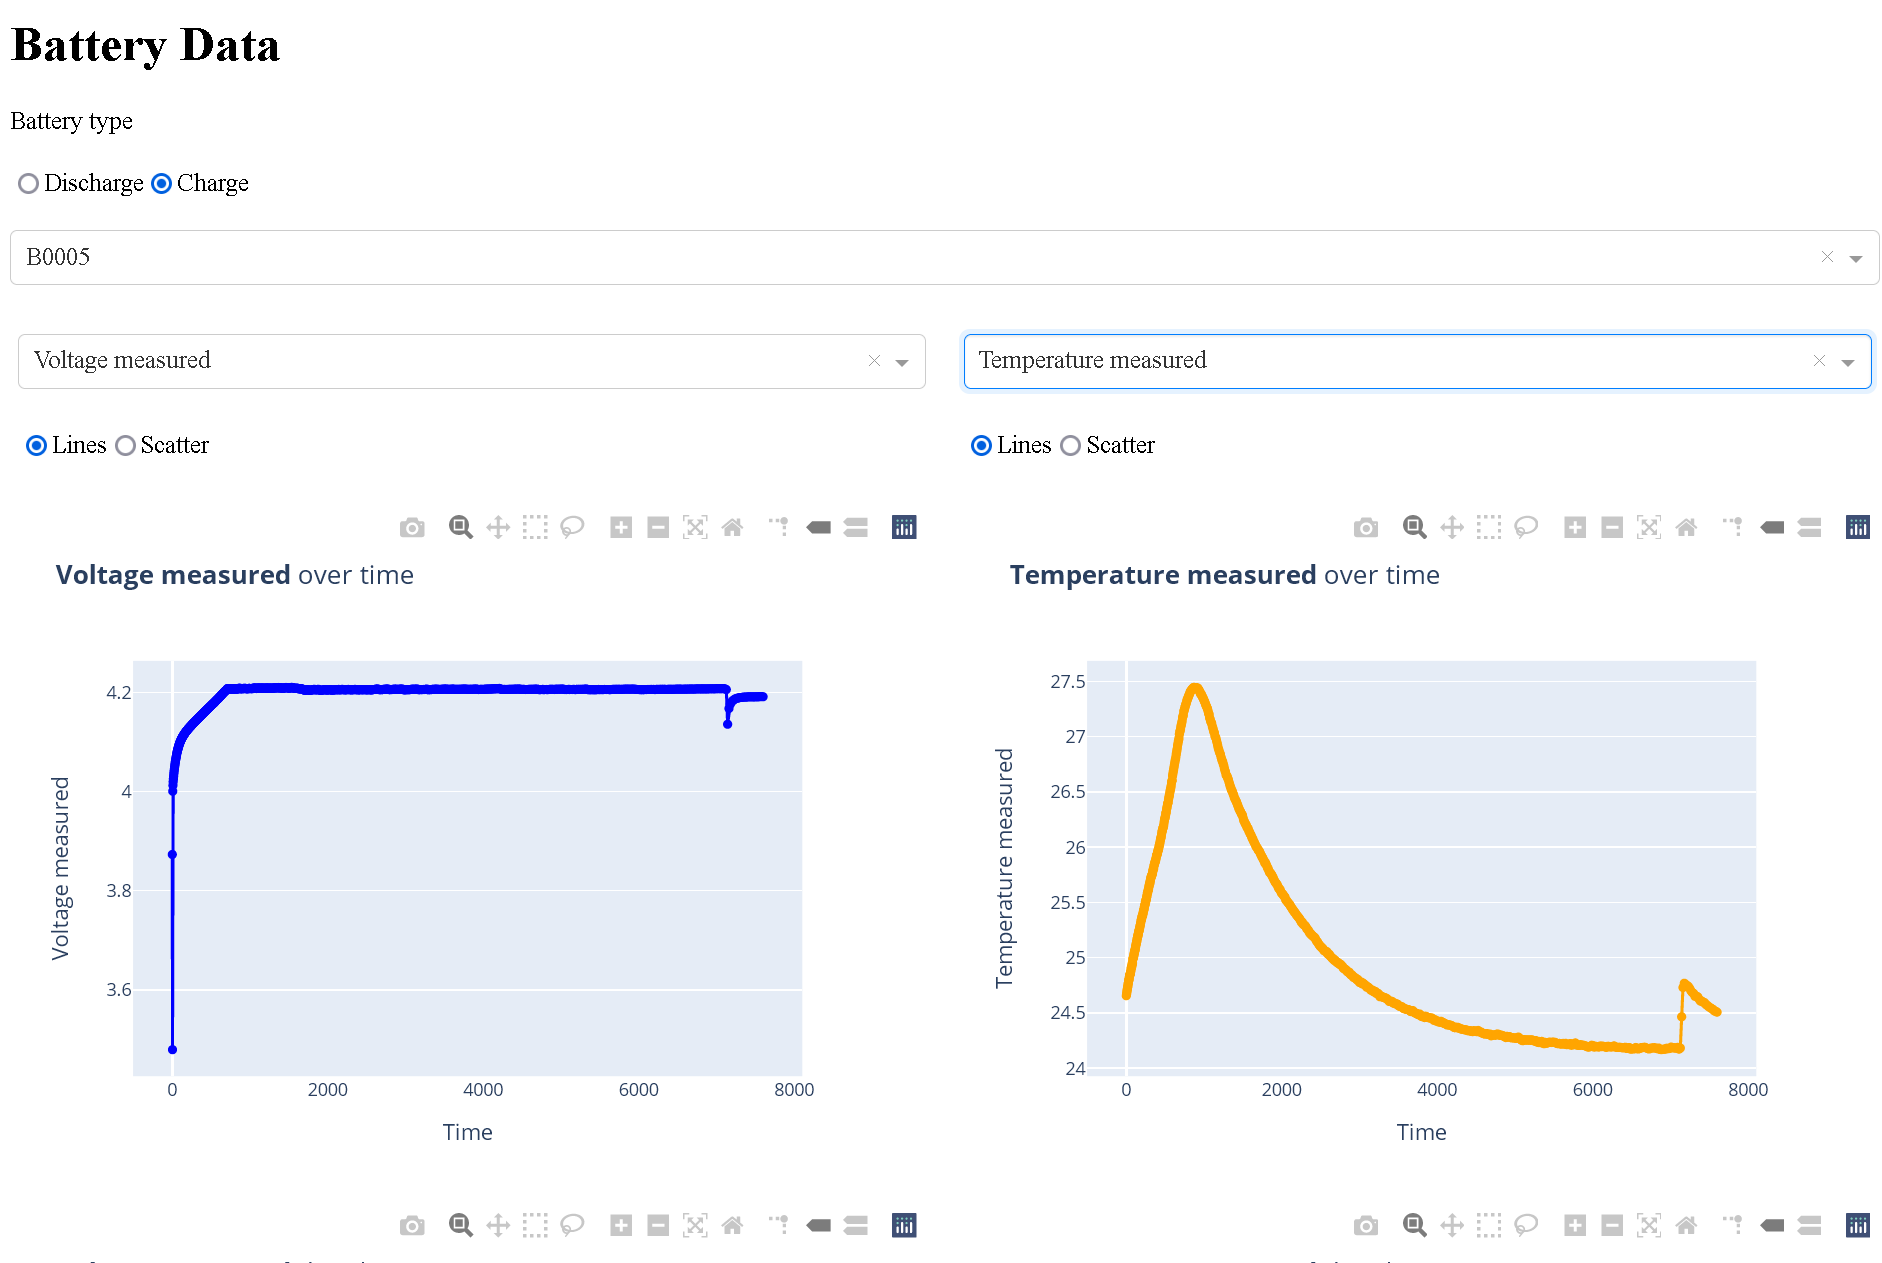

By zooming-in on the voltage chart, we observe that at the same time there was a change in the temperature. An increase in temperature decreases the voltage.

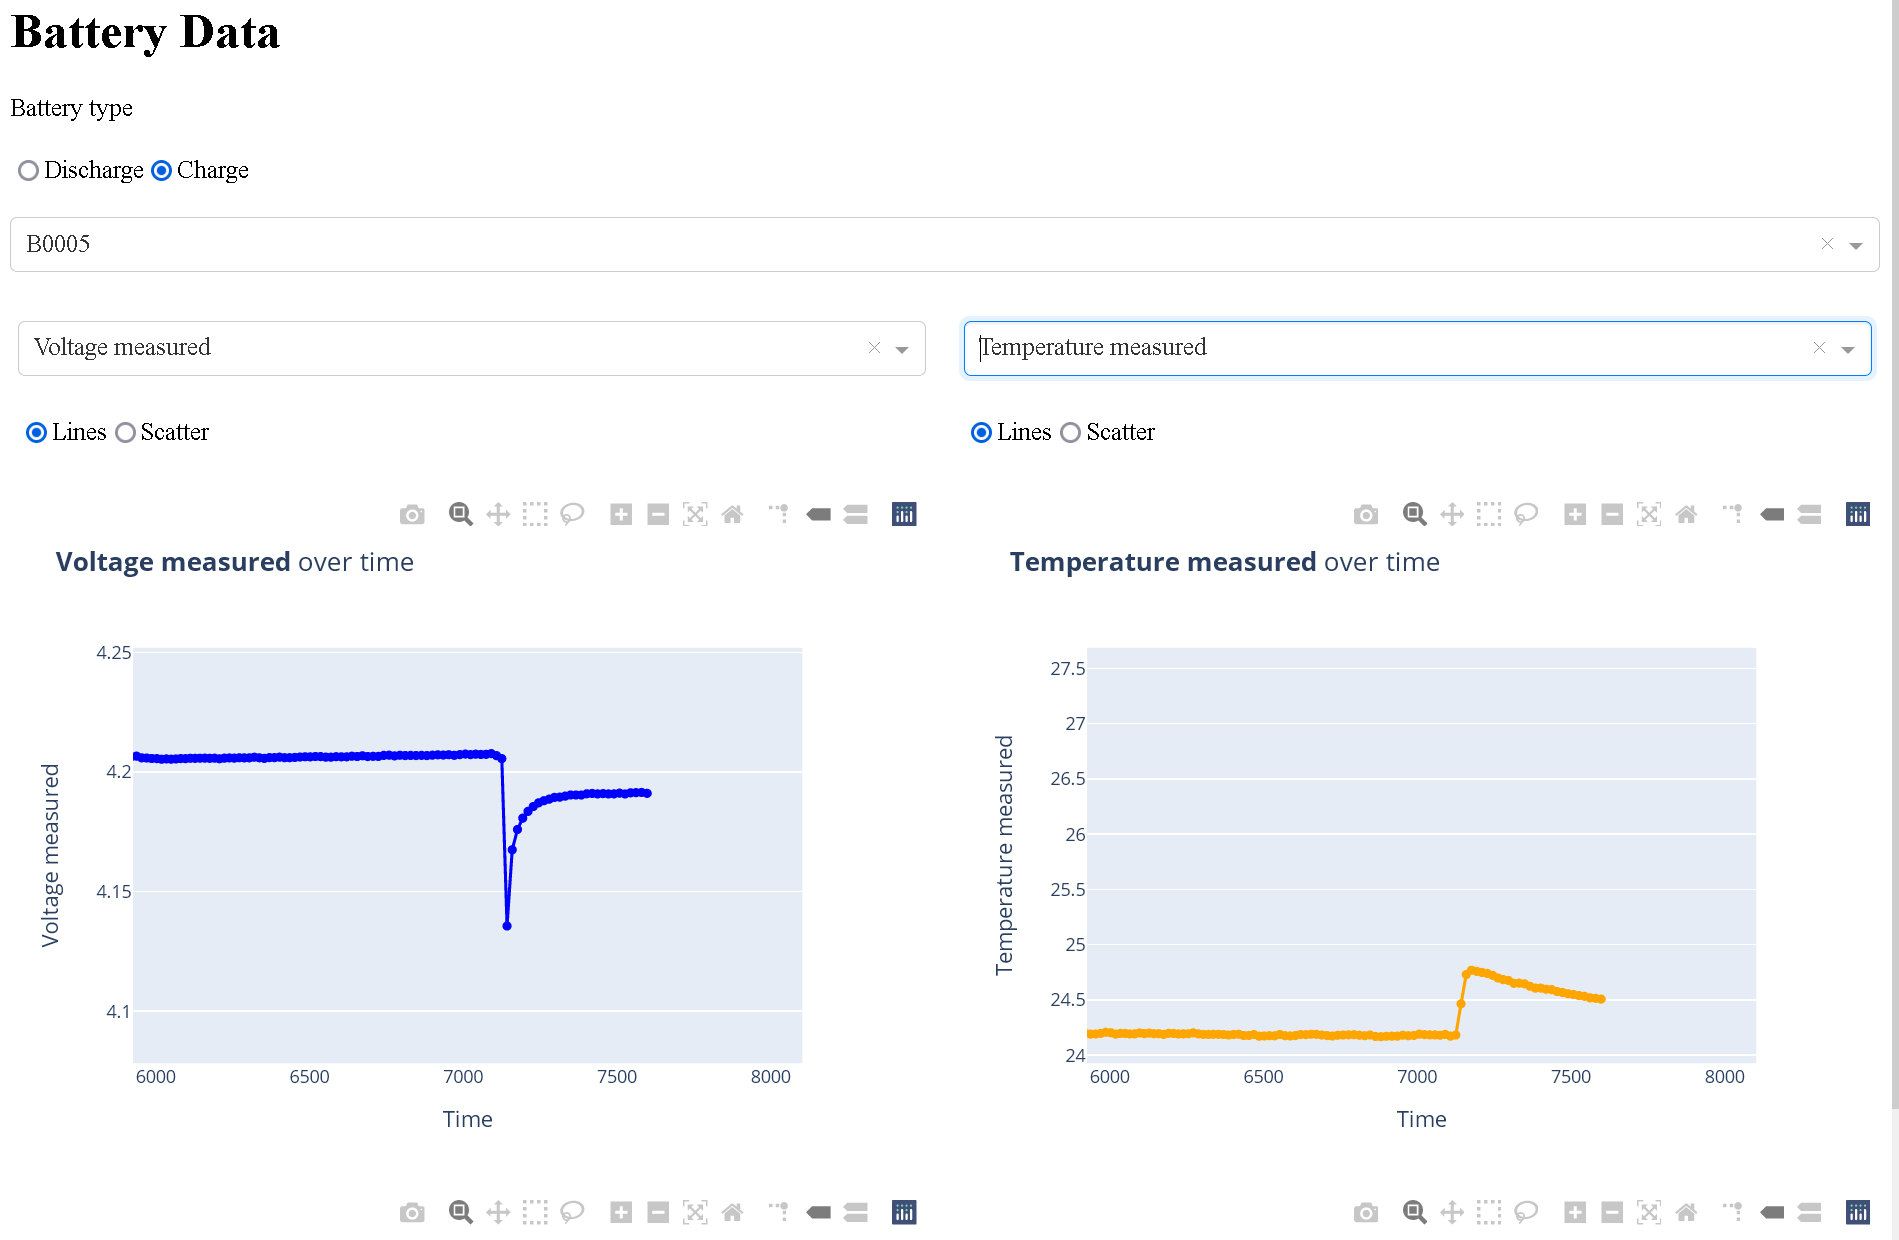

Run the cell below and start comparing graphs! 

In [12]:
# Get list of battery types
b_types = list(set(battery_type.values()))
b_types.remove('impedance')

# Graph 6 does not change 
df = df_b_type.groupby(['Type'], as_index = False)['Name'].count().rename(columns={'Name':'Total Number of Batteries'})
fig_6 = px.bar(df, x = "Type", y = "Total Number of Batteries", title = '<b>Batteries by type</b><br>', color_discrete_sequence = ['green']*len(b_types))

total = total_t[['Voltage_measured_(Volts)', 'Current_measured_(Amps)', 'Current_charge_(Amps)', 'Voltage_charge_(Volts)', 'Type']].dropna(subset = ['Voltage_measured_(Volts)', 'Current_measured_(Amps)']).copy()

app = JupyterDash(__name__)
app.layout = html.Div([
    html.Div([
    html.H1("Battery Data"),
    html.Label(["Battery type"]),
    #Division space
    html.H1(""),
    #Select battery type
    dcc.RadioItems(id = 'battery-radioitem',
                   options = [{'label': b.title(), 'value': b} for b in b_types], 
                   value = b_types[0]),
    #Division space
    html.H1(""),
    #Select battery from battery type
    dcc.Dropdown(id='battery-dropdown'),
    #Division space
    html.H1(""),    
    ]),
    
    
    #Graph information
    html.Div([
        
        html.Div([
            dcc.Dropdown(
                id='graph_1_y_value'),
            #Division space
            html.H1(""),
            dcc.RadioItems(
                id='graph_1_type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'})
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='graph_2_y_value'),
            #Division space
            html.H1(""),
            dcc.RadioItems(
                id='graph_2_type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'})
        ], 
        
        style={'width': '49%', 'float': 'right', 'display': 'inline-block'}),
        
    ], style={
        'padding': '10px 5px'
    }),
    #Division space
    html.H1(""),
    # Graphs 1 - 2
    html.Div([
        dcc.Graph(id='graph-1'),
    ], style={'display': 'inline-block', 'width': '49%', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='graph-2'),
    ], style={'display': 'inline-block', 'width': '49%', 'float': 'right', 'padding': '0 20'}),
    
    # Graphs 3 - 4
    html.Div([
        dcc.Graph(id='graph-3'),
    ], style={'display': 'inline-block', 'width': '49%', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='graph-4'),
    ], style={'display': 'inline-block', 'width': '49%', 'float': 'right', 'padding': '0 20'}),

    # Graphs 5 - 6
    html.Div([
        dcc.Graph(id='graph-5'),
    ], style={'display': 'inline-block', 'width': '49%', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='graph-6', figure = fig_6),
    ], style={'display': 'inline-block', 'width': '49%', 'float': 'right', 'padding': '0 20'}),
    
    # Graph 7
    html.Div([
        dcc.RadioItems(id='graph-7-y-axis', 
        options=[{'value': x, 'label': x.replace("_", " ")} 
                 for x in ['Voltage_measured_(Volts)', 'Current_measured_(Amps)', 'Current_charge_(Amps)', 'Voltage_charge_(Volts)']],
        value='Voltage_measured_(Volts)'),
        dcc.Graph(id='graph-7'),
    ], style={'display': 'inline-block', 'width': '100%', 'float': 'right', 'padding': '0 20'})
    
])
    

def create_graph(df, y_axis, graph_type, title, select_data, color):
    fig = px.scatter(df, x='Time', y=y_axis, labels = {y_axis:y_axis.replace("_", " ")}, title = title, color_discrete_sequence = [color])
    if graph_type == 'Scatter':
        fig.update_traces(mode='markers')
    elif graph_type == 'Lines':
        fig.update_traces(mode='lines+markers')
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(type='linear')
    #fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
    #                   xref='paper', yref='paper', showarrow=False, align='left',
    #                   text=title)
    #margin={'l': 20, 'b': 30, 'r': 10, 't': 10}, height=225, 
    fig.update_layout(autosize = False)
    try:
        fig.update_xaxes(range = [select_data['xaxis.range[0]'], select_data['xaxis.range[1]']])
    except:
        pass
    #fig['layout'] = {'xaxis':{'range':[zoomed out value]}}    
    
    return fig

def create_distribution(df, y_axis, title, color):
    fig = px.histogram(df, x = y_axis, title = title, range_x = [df[y_axis].min()-0.1, df[y_axis].max()+0.1],
                      labels = {y_axis:y_axis.replace("_", " ")}, color_discrete_sequence = [color])
    return fig

# Update dropdown
@app.callback(
    [Output("battery-dropdown", "options"),
    Output("battery-dropdown", "value")],
    [Input("battery-radioitem", "value")])
def update_dropdown(value):
    option = [{'label':k, 'value':k} for k, v in battery_type.items() if v == value]
    return option, option[0]['value']

# Update graph information
@app.callback(
    [Output("graph_1_y_value", "options"),
    Output("graph_1_y_value", "value"),
    Output("graph_1_type", "options"),
    Output("graph_1_type", "value")],
    [Input("battery-dropdown", "value"),
     Input("battery-radioitem", "value")])
def graph_information_1(battery, b_type):
    df = data[battery].copy()
    if b_type == 'charge':
        option_1_axis = [{'label': i.replace('_', ' '), 'value': i} for i in df.columns[:-2]]
    elif b_type == 'discharge':
        option_1_axis = [{'label': i.replace('_', ' '), 'value': i} for i in df.columns[:-3]]
    value_1_axis = df.columns[0]
    options_1_chart = [{'label': i, 'value': i} for i in ['Lines', 'Scatter']]
    value_1_chart = 'Lines'
    results = [option_1_axis, value_1_axis, options_1_chart, value_1_chart]
    return results

@app.callback(
    [Output("graph_2_y_value", "options"),
    Output("graph_2_y_value", "value"),
    Output("graph_2_type", "options"),
    Output("graph_2_type", "value")],
    [#Input("graph_1_y_value", "value"),
     Input("battery-dropdown", "value"),
     Input("battery-radioitem", "value")])
def graph_information_2(battery, b_type): 
    df = data[battery].copy()
    if b_type == 'charge':
        remaining_columns = df.columns[:-2]#.drop(graph_1)
    elif b_type == 'discharge':
        remaining_columns = df.columns[:-3]#.drop(graph_1)
    option_2_axis = [{'label':i.replace('_', ' '), 'value': i} for i in remaining_columns]
    value_2_axis = remaining_columns[0]
    option_2_chart = [{'label': i, 'value': i} for i in ['Lines', 'Scatter']]
    value_2_chart = 'Lines'
    results = [option_2_axis, value_2_axis, option_2_chart, value_2_chart]
    return results  

# Graph 1
@app.callback(
    Output('graph-1', 'figure'),
    [Input("battery-dropdown", "value"),
     Input('graph_1_y_value', 'value'),
     Input('graph_1_type', 'value'),
     Input('graph-2', 'relayoutData')])
def update_char_1(battery, y_axis, chart_type, select_data):
    df = data[battery].copy()
    title = '<b>{}</b> over time'.format(y_axis.replace("_", " "))
    return create_graph(df, y_axis, chart_type, title, select_data, 'blue')     

# Graph 3
@app.callback(
    Output('graph-3', 'figure'),
    [Input("battery-dropdown", "value"),
     Input('graph_1_y_value', 'value')])
def update_distribution_1(battery, y_axis):
    df = data[battery].copy()
    title = '<b>{}</b> distribution'.format(y_axis.replace("_", " "))
    return create_distribution(df, y_axis, title, 'blue')     


# Graph 2
@app.callback(
    Output('graph-2', 'figure'),
    [Input("battery-dropdown", "value"),
     Input('graph_2_y_value', 'value'),
     Input('graph_2_type', 'value'),
     Input('graph-1', 'relayoutData')])
def update_char_2(battery, y_axis, chart_type, select_data):
    df = data[battery].copy()
    title = '<b>{}</b> over time'.format(y_axis.replace("_", " "))
    return create_graph(df, y_axis, chart_type, title, select_data, 'orange')    

# Graph 4
@app.callback(
    Output('graph-4', 'figure'),
    [Input("battery-dropdown", "value"),
     Input('graph_2_y_value', 'value')])
def update_distribution_2(battery, y_axis):
    df = data[battery].copy()
    title = '<b>{}</b> distribution'.format(y_axis.replace("_", " "))
    return create_distribution(df, y_axis, title, 'orange')   


# Graph 5
@app.callback(
    Output('graph-5', 'figure'),
    [Input("battery-dropdown", "value"),
     Input("battery-radioitem", "value")])
def update_heatmap(battery, b_type):
    df = data[battery].copy()
    if b_type == 'charge':
        corr = df[df.columns[:-2]].corr()     
    elif b_type == 'discharge':
        corr = df[df.columns[:-3]].corr()  
    x_axis_labels = [x.replace("_", " ").title() for x in corr.columns]
    y_axis_labels = [x.replace("_", " ").title() for x in corr.columns]
    fig = px.imshow(corr,
                labels=dict(color="Correlation"),
                x = x_axis_labels,
                y = y_axis_labels,
                title = '<b>Variables correlation</b>'
               )
    fig.update_xaxes(side="bottom")
    return fig

@app.callback(
    Output("graph-7", "figure"), 
    [Input("graph-7-y-axis", "value")])
def box_chart(y):
    title = '<b>Box chart</b> {}'.format(y.replace("_", " "))
    fig = px.box(total, x='Type', y=y, title = title, labels = {y:y.replace("_", " ")})
    return fig

# Run app and display result inline in the notebook
app.run_server(mode='external') #'inline' 'external'

Dash app running on http://127.0.0.1:8050/


### Instructions to see the dashboard

* Run the python cell above either in mode external (load the IP in the browser) or internal (display in the jupyter notebook).

* Navigate through the different sections of the dashboard. The following image depicts the interface:

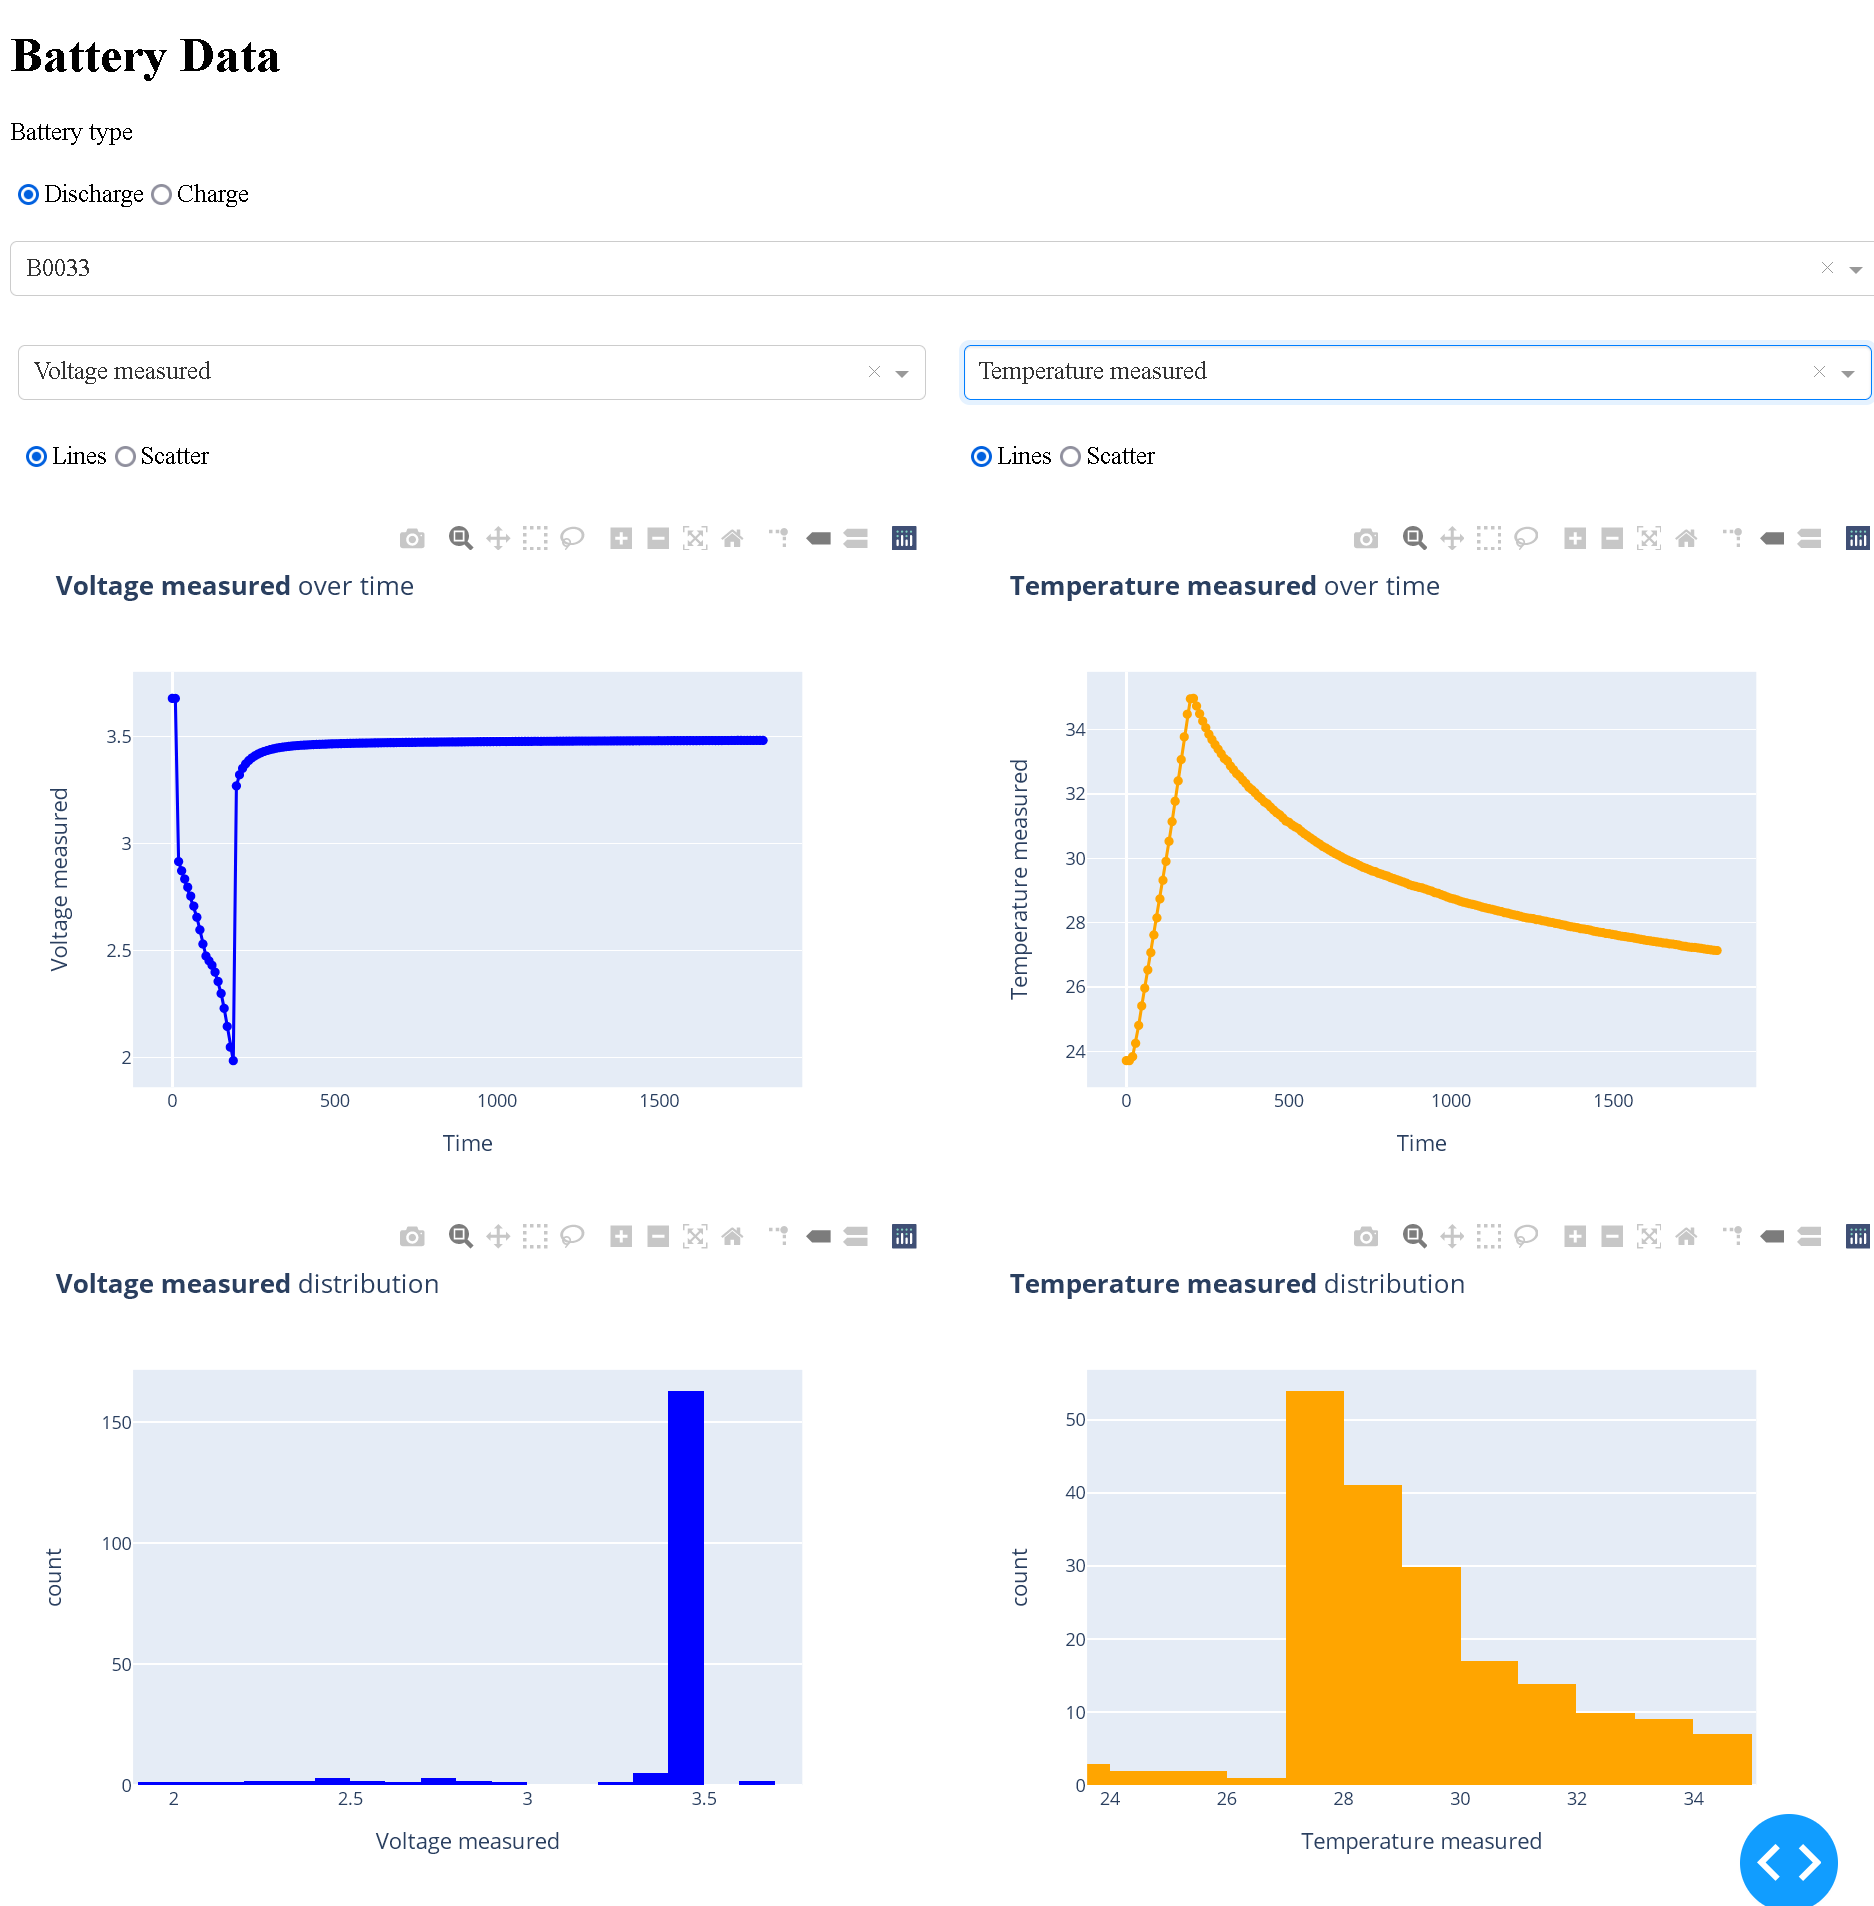
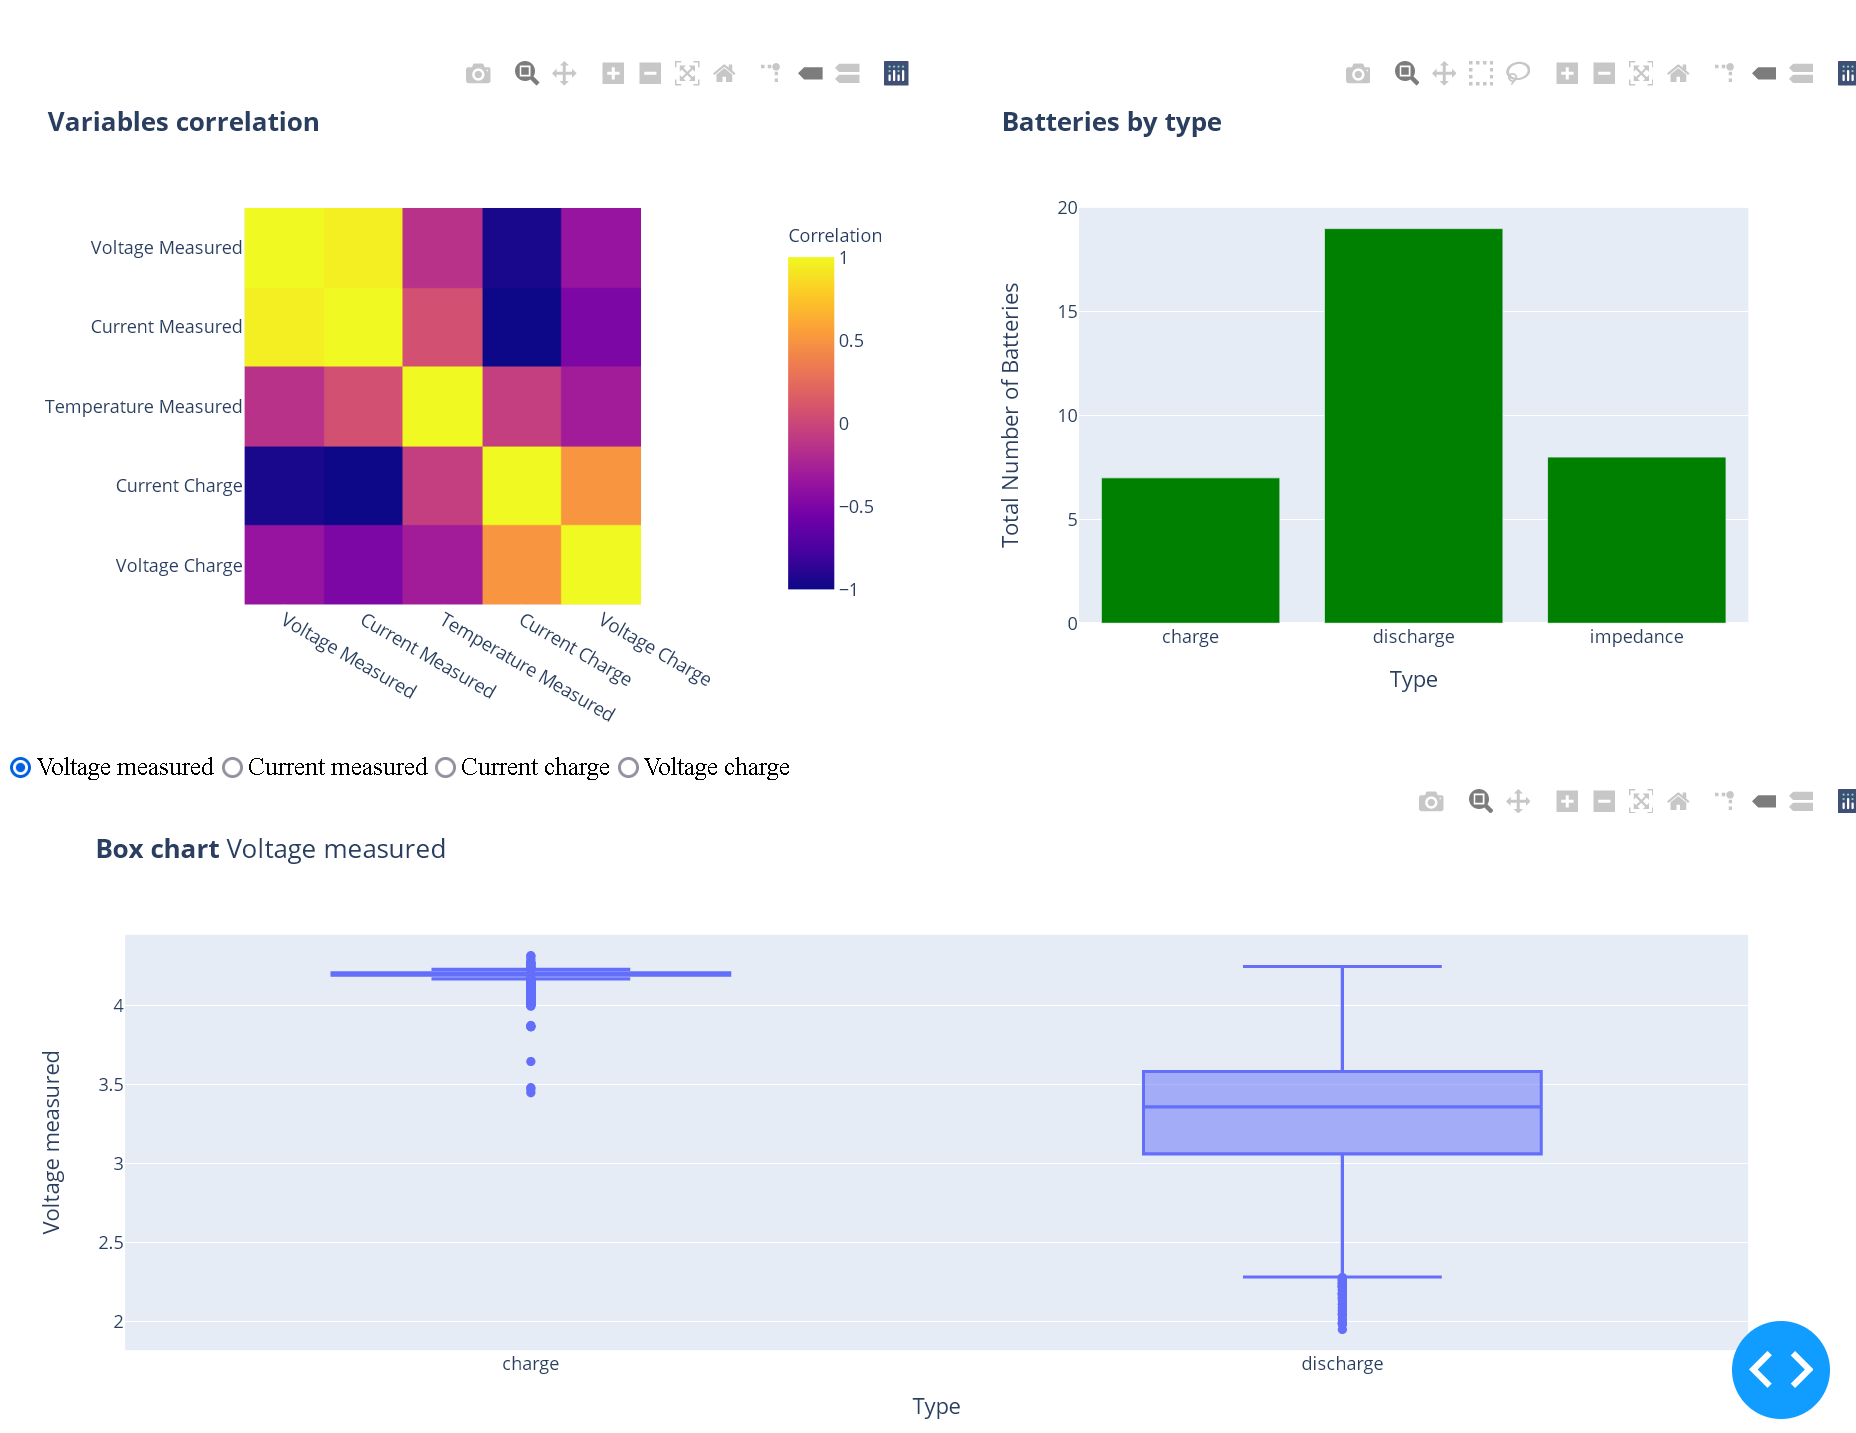